# Task 3

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dependent And Independent

In [3]:
x = data.iloc[:,1:5].values
y = data.iloc[:,-1].values

## Subplots of Columns

Text(0.5, 1.0, 'Petal Width')

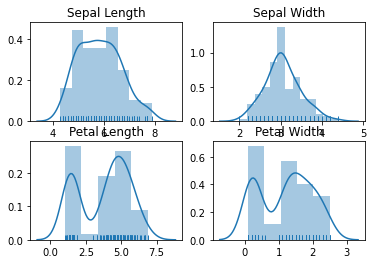

In [4]:
plt.subplot(2,2,1)
sns.distplot(data['SepalLengthCm'].values, rug=True)
plt.title('Sepal Length')

plt.subplot(2,2,2)
sns.distplot(data['SepalWidthCm'].values, rug=True)
plt.title('Sepal Width')

plt.subplot(2,2,3)
sns.distplot(data['PetalLengthCm'].values, rug=True)
plt.title('Petal Length')

plt.subplot(2,2,4)
sns.distplot(data['PetalWidthCm'].values, rug=True)
plt.title('Petal Width')


## Pairplot

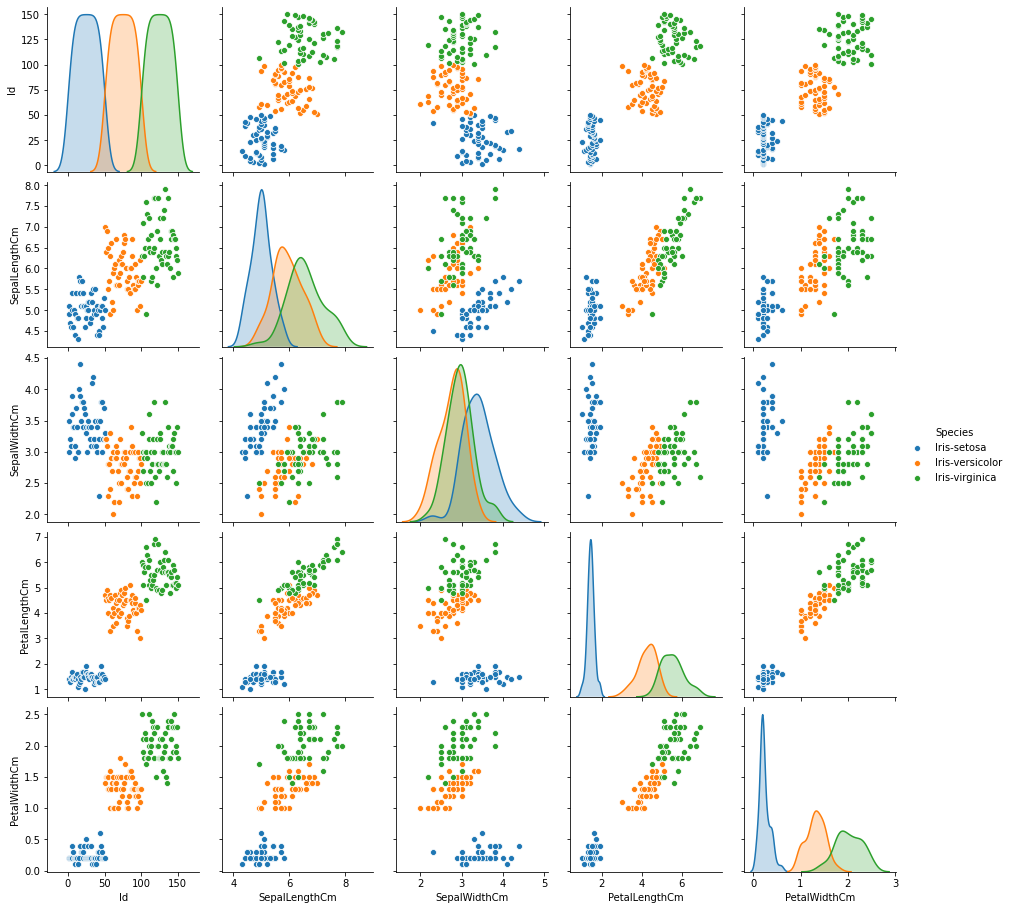

In [5]:
sns.pairplot(data, hue='Species')

## Model Selection

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =  train_test_split(x,y ,test_size = 0.20 , random_state = 42)

# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

## Predicting Values

In [8]:
y_pred = dec.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


### Predicting random values

In [9]:
print(dec.predict([[6.5,2.8,4.6,1.5]]))

['Iris-versicolor']


## Classification Report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Accuracy

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy of model is : ', accuracy_score(y_test , y_pred))

Accuracy of model is :  1.0


## Confusion Matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


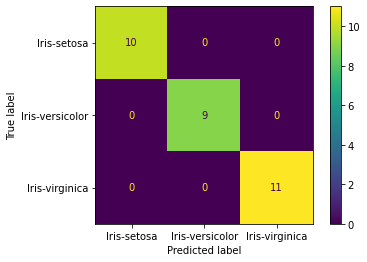

In [12]:
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
print(confusion_matrix(y_test , y_pred))

plot_confusion_matrix(dec, x_test, y_test)

# Classification Tree

[Text(286.15384615384613, 841.2857142857143, 'petal-length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(214.61538461538458, 711.8571428571429, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(357.6923076923077, 711.8571428571429, 'petal-length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(143.07692307692307, 582.4285714285714, 'petal-width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(71.53846153846153, 453.00000000000006, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(214.61538461538458, 453.00000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(572.3076923076923, 582.4285714285714, 'petal-width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(357.6923076923077, 453.00000000000006, 'petal-length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\ncla

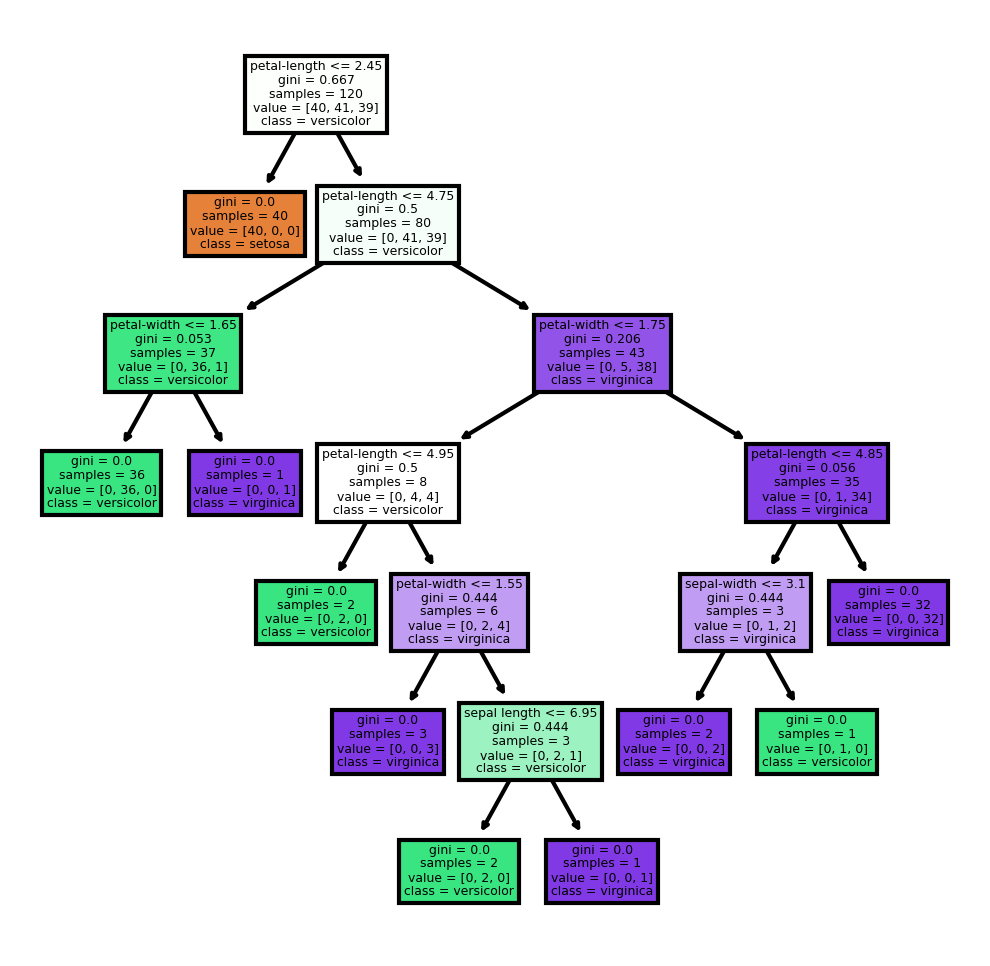

In [13]:
from sklearn import tree
feat = ['sepal length' , 'sepal-width' , 'petal-length'  ,'petal-width']
classes = ['setosa' , 'versicolor' , 'virginica']

fig , axes = plt.subplots(nrows = 1  ,ncols=1 , figsize = (4,4) ,dpi=300)
tree.plot_tree(dec , feature_names = feat , class_names = classes , filled = True)